# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [1]:
import os
import keras
import tensorflow
from keras.datasets import cifar10

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""

2021-11-19 09:26:27.414727: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-11-19 09:26:27.414792: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.np_utils.to_categorical(y, num_classes)
    return y    

In [4]:

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
## 超參數設定
"""
Set your required experiment parameters
"""
## 超參數設定
LEARNING_RATE = [1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95


In [7]:
results = {}
"""
建立你的訓練與實驗迴圈並蒐集資料
"""

'\n建立你的訓練與實驗迴圈並蒐集資料\n'

### SGD LEARNING_RATE = [1e-2, 1e-3, 1e-4]

In [8]:

"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.gradient_descent_v2.SGD(learning_rate=lr, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "sgd-exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


2021-11-19 09:26:55.754815: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-11-19 09:26:55.754888: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2021-11-19 09:26:55.754925: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (11402.pyspark3): /proc/driver/nvidia/version does not exist
2021-11-19 09:26:55.755148: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-19 09:26:56.359980: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 ex

Epoch 1/50
196/196 [==============================] - 5s 24ms/step - loss: 1.8137 - accuracy: 0.3479 - val_loss: 1.6408 - val_accuracy: 0.4159
Epoch 2/50
196/196 [==============================] - 4s 20ms/step - loss: 1.5953 - accuracy: 0.4319 - val_loss: 1.5919 - val_accuracy: 0.4307
Epoch 3/50
196/196 [==============================] - 5s 24ms/step - loss: 1.5103 - accuracy: 0.4646 - val_loss: 1.5224 - val_accuracy: 0.4589
Epoch 4/50
196/196 [==============================] - 3s 15ms/step - loss: 1.4502 - accuracy: 0.4834 - val_loss: 1.5005 - val_accuracy: 0.4716
Epoch 5/50
196/196 [==============================] - 3s 14ms/step - loss: 1.4053 - accuracy: 0.5001 - val_loss: 1.4883 - val_accuracy: 0.4649
Epoch 6/50
196/196 [==============================] - 3s 15ms/step - loss: 1.3618 - accuracy: 0.5161 - val_loss: 1.4236 - val_accuracy: 0.4924
Epoch 7/50
196/196 [==============================] - 3s 17ms/step - loss: 1.3245 - accuracy: 0.5264 - val_loss: 1.4451 - val_accuracy: 0.4890

2021-11-19 09:29:35.550947: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
196/196 [==============================] - 3s 15ms/step - loss: 2.0258 - accuracy: 0.2783 - val_loss: 1.8603 - val_accuracy: 0.3468
Epoch 2/50
196/196 [==============================] - 3s 14ms/step - loss: 1.8038 - accuracy: 0.3668 - val_loss: 1.7543 - val_accuracy: 0.3855
Epoch 3/50
196/196 [==============================] - 3s 14ms/step - loss: 1.7177 - accuracy: 0.4008 - val_loss: 1.6830 - val_accuracy: 0.4065
Epoch 4/50
196/196 [==============================] - 3s 15ms/step - loss: 1.6584 - accuracy: 0.4184 - val_loss: 1.6367 - val_accuracy: 0.4241
Epoch 5/50
196/196 [==============================] - 3s 15ms/step - loss: 1.6114 - accuracy: 0.4343 - val_loss: 1.6006 - val_accuracy: 0.4425
Epoch 6/50
196/196 [==============================] - 3s 14ms/step - loss: 1.5727 - accuracy: 0.4479 - val_loss: 1.5666 - val_accuracy: 0.4476
Epoch 7/50
196/196 [==============================] - 3s 17ms/step - loss: 1.5397 - accuracy: 0.4606 - val_loss: 1.5556 - val_accuracy: 0.4502

2021-11-19 09:32:08.759324: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
196/196 [==============================] - 3s 15ms/step - loss: 2.2574 - accuracy: 0.1548 - val_loss: 2.1769 - val_accuracy: 0.2384
Epoch 2/50
196/196 [==============================] - 3s 14ms/step - loss: 2.1266 - accuracy: 0.2525 - val_loss: 2.0797 - val_accuracy: 0.2819
Epoch 3/50
196/196 [==============================] - 3s 15ms/step - loss: 2.0472 - accuracy: 0.2824 - val_loss: 2.0155 - val_accuracy: 0.2981
Epoch 4/50
196/196 [==============================] - 3s 14ms/step - loss: 1.9912 - accuracy: 0.3039 - val_loss: 1.9683 - val_accuracy: 0.3062
Epoch 5/50
196/196 [==============================] - 3s 14ms/step - loss: 1.9485 - accuracy: 0.3180 - val_loss: 1.9344 - val_accuracy: 0.3230
Epoch 6/50
196/196 [==============================] - 3s 14ms/step - loss: 1.9161 - accuracy: 0.3308 - val_loss: 1.9027 - val_accuracy: 0.3370
Epoch 7/50
196/196 [==============================] - 3s 14ms/step - loss: 1.8897 - accuracy: 0.3406 - val_loss: 1.8798 - val_accuracy: 0.3431

### RMSprop LEARNING_RATE = [1e-2, 1e-3, 1e-4]

In [9]:
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tensorflow.keras.optimizers.RMSprop(learning_rate=lr, epsilon=None, decay=0.0) 
    model.compile(loss="mean_squared_error", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "RMSprop-exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


2021-11-19 09:37:01.904092: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
196/196 [==============================] - 7s 32ms/step - loss: 0.1796 - accuracy: 0.0999 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 2/50
196/196 [==============================] - 5s 27ms/step - loss: 0.1801 - accuracy: 0.0997 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 3/50
196/196 [==============================] - 6s 29ms/step - loss: 0.1800 - accuracy: 0.1000 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 4/50
196/196 [==============================] - 5s 25ms/step - loss: 0.1800 - accuracy: 0.1000 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 5/50
196/196 [==============================] - 5s 28ms/step - loss: 0.1800 - accuracy: 0.1000 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 6/50
196/196 [==============================] - 5s 26ms/step - loss: 0.1800 - accuracy: 0.1000 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 7/50
196/196 [==============================] - 5s 25ms/step - loss: 0.1800 - accuracy: 0.1000 - val_loss: 0.1800 - val_accuracy: 0.1000

2021-11-19 09:40:57.088141: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/50
196/196 [==============================] - 5s 23ms/step - loss: 0.1783 - accuracy: 0.0999 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 2/50
196/196 [==============================] - 4s 23ms/step - loss: 0.1798 - accuracy: 0.0991 - val_loss: 0.1800 - val_accuracy: 0.1000
Epoch 3/50
196/196 [==============================] - 4s 22ms/step - loss: 0.1644 - accuracy: 0.1086 - val_loss: 0.0897 - val_accuracy: 0.1810
Epoch 4/50
196/196 [==============================] - 4s 22ms/step - loss: 0.0840 - accuracy: 0.2536 - val_loss: 0.0819 - val_accuracy: 0.3019
Epoch 5/50
196/196 [==============================] - 4s 22ms/step - loss: 0.0789 - accuracy: 0.3312 - val_loss: 0.0763 - val_accuracy: 0.3672
Epoch 6/50
196/196 [==============================] - 4s 22ms/step - loss: 0.0762 - accuracy: 0.3638 - val_loss: 0.0781 - val_accuracy: 0.3464
Epoch 7/50
196/196 [==============================] - 4s 22ms/step - loss: 0.0748 - accuracy: 0.3811 - val_loss: 0.0797 - val_accuracy: 0.3329

Epoch 1/50
196/196 [==============================] - 6s 27ms/step - loss: 0.0824 - accuracy: 0.2897 - val_loss: 0.0812 - val_accuracy: 0.2893
Epoch 2/50
196/196 [==============================] - 5s 27ms/step - loss: 0.0773 - accuracy: 0.3578 - val_loss: 0.0786 - val_accuracy: 0.3392
Epoch 3/50
196/196 [==============================] - 6s 29ms/step - loss: 0.0749 - accuracy: 0.3877 - val_loss: 0.0755 - val_accuracy: 0.3829
Epoch 4/50
196/196 [==============================] - 5s 26ms/step - loss: 0.0731 - accuracy: 0.4061 - val_loss: 0.0725 - val_accuracy: 0.4147
Epoch 5/50
196/196 [==============================] - 5s 27ms/step - loss: 0.0717 - accuracy: 0.4225 - val_loss: 0.0725 - val_accuracy: 0.4086
Epoch 6/50
196/196 [==============================] - 6s 31ms/step - loss: 0.0704 - accuracy: 0.4355 - val_loss: 0.0761 - val_accuracy: 0.3702
Epoch 7/50
196/196 [==============================] - 6s 29ms/step - loss: 0.0694 - accuracy: 0.4466 - val_loss: 0.0715 - val_accuracy: 0.4252

### Adagrad LEARNING_RATE = [1e-2, 1e-3, 1e-4]

In [10]:
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tensorflow.keras.optimizers.Adagrad(learning_rate=lr, epsilon=None, decay=0.0) 
    model.compile(loss="mean_squared_error", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "Adagrad-exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 19ms/step - loss: 0.0894 - acc

Experiment with LR = 0.001000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 18ms/step - loss: 0.0913 - acc

Experiment with LR = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 5s 22ms/step - loss: 0.0916 - acc

### Adam LEARNING_RATE = [1e-2, 1e-3, 1e-4]

In [14]:
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = tensorflow.keras.optimizers.Adam(learning_rate=lr, epsilon=None, decay=0.0) 
    model.compile(loss="mean_squared_error", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "Adam-exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 20ms/step - loss: 0.1795 - acc

Experiment with LR = 0.001000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 3s 15ms/step - loss: 0.0916 - acc

Experiment with LR = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
196/196 [==============================] - 4s 17ms/step - loss: 0.0808 - acc

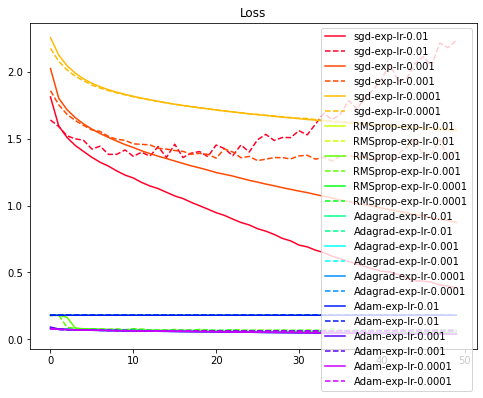

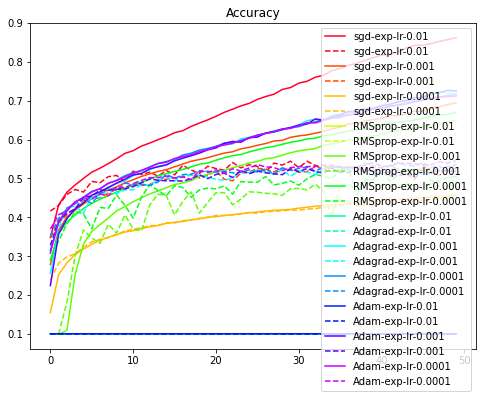

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

"""
將實驗結果繪出
"""
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]


plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()